# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [1]:
from aitlas.datasets import MassachusettsRoadsDataset
from aitlas.models import DeepLabV3
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTranspose

/home/dragik/anaconda3/envs/aitlas/lib/python3.8/site-packages/skimage/restoration/inpaint.py:6: DeprecationWarning: Please use `laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import laplace
/home/dragik/anaconda3/envs/aitlas/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
/home/dragik/anaconda3/envs/aitlas/lib/python3.8/site-packages/skimage/segmentation/random_walker_segmentation.py:49: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(scipy.__version__) >= Version('1.1'):
/home/dragik/anaconda3/envs/aitlas/lib/python3.8/site-packages/albumentations/augmentations/geometric/functional.py:6: DeprecationWarning: Please use `gaussian_filter` from the `

## Visualize images and masks

Total number of patches: 9972


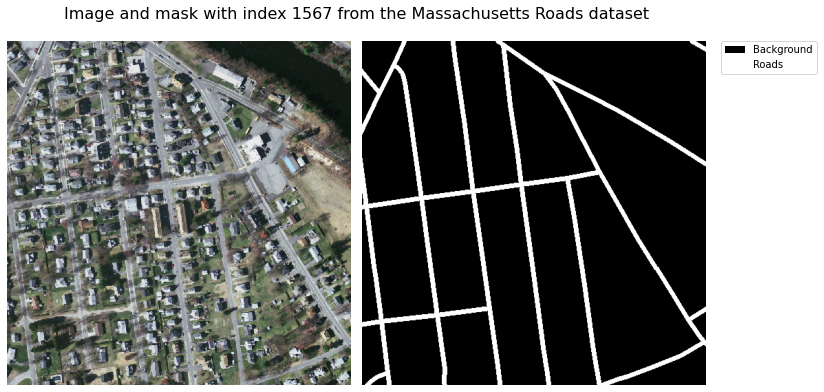

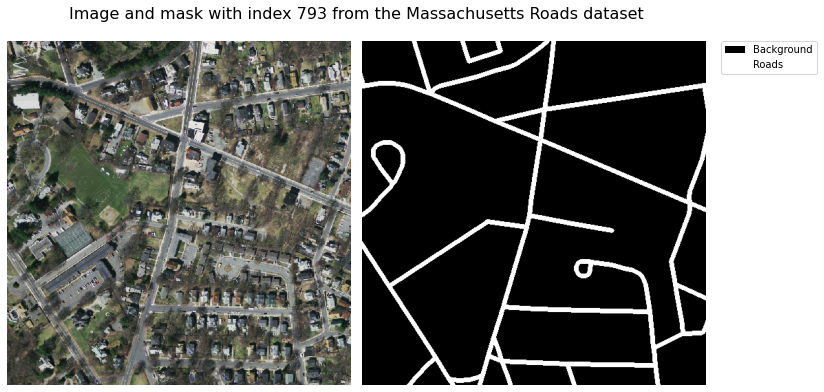

In [2]:
dataset_config = {
    "data_dir": "../data/MassachusettsRoads/train_splits",
    "csv_file": "../data/MassachusettsRoads/train.txt"
}
dataset = MassachusettsRoadsDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1567);
dataset.show_image(793);

In [3]:
dataset.data_distribution_table()

,Number of pixels
Background,2.374094e+09
Roads,1.189066e+08


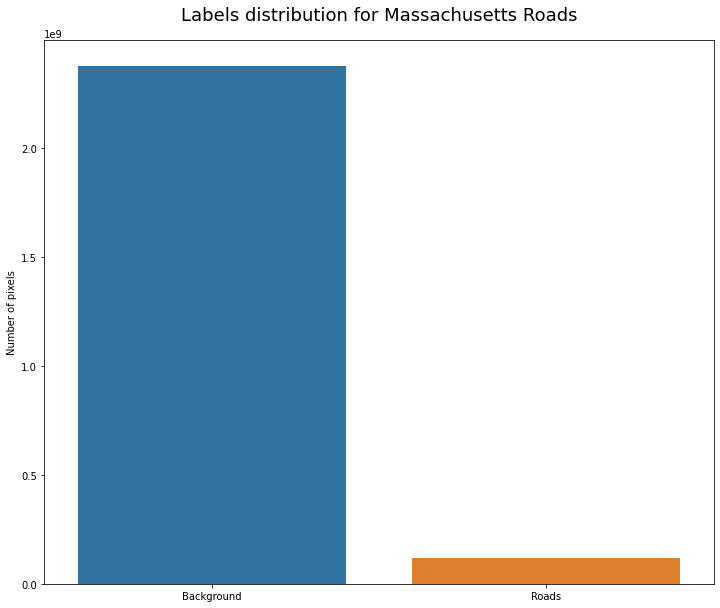

In [4]:
dataset.data_distribution_barchart();

## Load train data

In [5]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "data_dir": "../data/MassachusettsRoads/train_splits",
    "csv_file": "../data/MassachusettsRoads/train.txt",
    "joint_transforms": ["aitlas.transforms.FlipHVRandomRotate"],
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = MassachusettsRoadsDataset(train_dataset_config)

validation_dataset_config = {
    "batch_size": 16,
    "shuffle": False,
    "data_dir": "../data/MassachusettsRoads/val_splits",
    "csv_file": "../data/MassachusettsRoads/val.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
validation_dataset = MassachusettsRoadsDataset(validation_dataset_config)

len(train_dataset), len(validation_dataset)

(9972, 126)

## Create the model

In [6]:
epochs = 25
model_directory = "./experiments/MassachusettsRoads"
model_config = {
    "num_classes": 2, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [7]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    val_dataset=validation_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
)

2022-10-31 06:09:39,222 INFO Starting training.
training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:15<00:00,  1.43it/s]
2022-10-31 06:16:55,160 INFO epoch: 1, time: 436, loss:  0.21281
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.47it/s]
2022-10-31 06:19:15,840 INFO IOU:0.9385795928328989, IOU mean:0.7137156143615252, IOU per Class:[0.96744735 0.45998388]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.49it/s]
2022-10-31 06:19:18,151 INFO IOU:0.9214029799772135, IOU mean:0.7368990724060454, IOU per Class:[0.95710381 0.51669433]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 0 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:18<00:00,  1.42it/s]
2022-10-31 06:26:36,435 INFO epoch: 2, time: 438, loss:  0.10119
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.48it/s]
2022-10-31 06:28:55,688 INFO IOU:0.9421670506351766, IOU mean:0.7280317670200409, IOU per Class:[0.96936399 0.48669955]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.33it/s]
2022-10-31 06:28:58,108 INFO IOU:0.9263341641218723, IOU mean:0.747989081992465, IOU per Class:[0.96000637 0.53597179]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 1 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:16<00:00,  1.43it/s]
2022-10-31 06:36:14,194 INFO epoch: 3, time: 436, loss:  0.09010
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:20<00:00,  4.45it/s]
2022-10-31 06:38:34,560 INFO IOU:0.9439690616497006, IOU mean:0.7291440475383429, IOU per Class:[0.97037075 0.48791734]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.32it/s]
2022-10-31 06:38:36,991 INFO IOU:0.9284561731565516, IOU mean:0.7500479779802887, IOU per Class:[0.96123992 0.53885604]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 2 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:16<00:00,  1.43it/s]
2022-10-31 06:45:53,508 INFO epoch: 4, time: 436, loss:  0.08621
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.48it/s]
2022-10-31 06:48:12,750 INFO IOU:0.9460138810976134, IOU mean:0.7416196177186514, IOU per Class:[0.97143014 0.5118091 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.38it/s]
2022-10-31 06:48:15,134 INFO IOU:0.9313490512980128, IOU mean:0.7653862111442133, IOU per Class:[0.96271962 0.5680528 ]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 3 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:19<00:00,  1.42it/s]
2022-10-31 06:55:34,259 INFO epoch: 5, time: 439, loss:  0.08414
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:22<00:00,  4.39it/s]
2022-10-31 06:57:56,364 INFO IOU:0.9465204110633433, IOU mean:0.7426867392327159, IOU per Class:[0.97170805 0.51366542]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.36it/s]
2022-10-31 06:57:58,763 INFO IOU:0.9324985045523607, IOU mean:0.7674060832976783, IOU per Class:[0.96337876 0.57143341]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 4 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:15<00:00,  1.43it/s]
2022-10-31 07:05:14,585 INFO epoch: 6, time: 435, loss:  0.08292
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.46it/s]
2022-10-31 07:07:34,444 INFO IOU:0.9469876648757093, IOU mean:0.7500185079588204, IOU per Class:[0.97191541 0.52812161]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.34it/s]
2022-10-31 07:07:36,858 INFO IOU:0.9337334293591627, IOU mean:0.773638327348004, IOU per Class:[0.9640128  0.58326386]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 5 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:15<00:00,  1.43it/s]
2022-10-31 07:14:52,523 INFO epoch: 7, time: 436, loss:  0.08192
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:21<00:00,  4.41it/s]
2022-10-31 07:17:14,076 INFO IOU:0.9474321425997414, IOU mean:0.7530098582580509, IOU per Class:[0.97214796 0.53387176]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.43it/s]
2022-10-31 07:17:16,426 INFO IOU:0.9341777193227371, IOU mean:0.7774237770351097, IOU per Class:[0.96422019 0.59062736]
2022-10-31 07:17:16,427 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 6 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:20<00:00,  1.42it/s]
2022-10-31 07:24:37,080 INFO epoch: 8, time: 441, loss:  0.08097
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:22<00:00,  4.39it/s]
2022-10-31 07:26:59,360 INFO IOU:0.9483011003449432, IOU mean:0.7483754423032947, IOU per Class:[0.97267278 0.52407811]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.29it/s]
2022-10-31 07:27:01,809 INFO IOU:0.9330152259866429, IOU mean:0.7706023339545549, IOU per Class:[0.96363439 0.57757028]
2022-10-31 07:27:01,810 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 7 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:16<00:00,  1.43it/s]
2022-10-31 07:34:18,749 INFO epoch: 9, time: 437, loss:  0.08038
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:20<00:00,  4.44it/s]
2022-10-31 07:36:39,349 INFO IOU:0.9481205082766131, IOU mean:0.7511831017079086, IOU per Class:[0.97255007 0.52981614]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.31it/s]
2022-10-31 07:36:41,781 INFO IOU:0.9348568747660884, IOU mean:0.7768681298005153, IOU per Class:[0.96463561 0.58910065]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 8 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:17<00:00,  1.43it/s]
2022-10-31 07:43:59,057 INFO epoch: 10, time: 438, loss:  0.07948
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.49it/s]
2022-10-31 07:46:18,169 INFO IOU:0.9486660208884079, IOU mean:0.7485124102414775, IOU per Class:[0.97287716 0.52414766]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.31it/s]
2022-10-31 07:46:20,604 INFO IOU:0.9348722016393757, IOU mean:0.7725451897152364, IOU per Class:[0.96471668 0.5803737 ]
2022-10-31 07:46:20,605 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 9 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:19<00:00,  1.42it/s]
2022-10-31 07:53:40,300 INFO epoch: 11, time: 440, loss:  0.07925
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:20<00:00,  4.44it/s]
2022-10-31 07:56:02,100 INFO IOU:0.9485708259941084, IOU mean:0.7500257167438182, IOU per Class:[0.97281144 0.52723999]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.28it/s]
2022-10-31 07:56:04,553 INFO IOU:0.9338662580771138, IOU mean:0.7713082381172036, IOU per Class:[0.96413043 0.57848605]
2022-10-31 07:56:04,554 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 10 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:15<00:00,  1.43it/s]
2022-10-31 08:03:19,913 INFO epoch: 12, time: 435, loss:  0.07897
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.48it/s]
2022-10-31 08:05:39,285 INFO IOU:0.94870152369257, IOU mean:0.7531032047797191, IOU per Class:[0.9728626  0.53334381]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.31it/s]
2022-10-31 08:05:41,721 INFO IOU:0.9341938803690611, IOU mean:0.7706388353398278, IOU per Class:[0.96433158 0.57694609]
2022-10-31 08:05:41,722 INFO INFO: Early stopping counter 3 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 11 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:14<00:00,  1.44it/s]
2022-10-31 08:12:56,404 INFO epoch: 13, time: 435, loss:  0.07806
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:18<00:00,  4.50it/s]
2022-10-31 08:15:15,170 INFO IOU:0.9490586816366438, IOU mean:0.7580800245844931, IOU per Class:[0.97302517 0.54313488]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.21it/s]
2022-10-31 08:15:17,679 INFO IOU:0.9346050827001104, IOU mean:0.7810544092911673, IOU per Class:[0.96440949 0.59769933]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 12 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:15<00:00,  1.43it/s]
2022-10-31 08:22:33,161 INFO epoch: 14, time: 436, loss:  0.07776
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.48it/s]
2022-10-31 08:24:52,313 INFO IOU:0.9496061730032377, IOU mean:0.7544529448078257, IOU per Class:[0.97336311 0.53554278]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.36it/s]
2022-10-31 08:24:54,713 INFO IOU:0.9350703717167202, IOU mean:0.7772099880969852, IOU per Class:[0.96475539 0.58966459]
2022-10-31 08:24:54,714 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 13 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:19<00:00,  1.42it/s]
2022-10-31 08:32:14,079 INFO epoch: 15, time: 440, loss:  0.07745
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:21<00:00,  4.40it/s]
2022-10-31 08:34:36,016 INFO IOU:0.9497629545957121, IOU mean:0.7584134728367156, IOU per Class:[0.97341962 0.54340732]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.24it/s]
2022-10-31 08:34:38,507 INFO IOU:0.9353327078087816, IOU mean:0.7772083869553829, IOU per Class:[0.96491051 0.58950626]
2022-10-31 08:34:38,508 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 14 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:16<00:00,  1.43it/s]
2022-10-31 08:41:54,918 INFO epoch: 16, time: 436, loss:  0.07710
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.49it/s]
2022-10-31 08:44:14,023 INFO IOU:0.9495806178825763, IOU mean:0.7561966183109852, IOU per Class:[0.97333138 0.53906185]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.33it/s]
2022-10-31 08:44:16,447 INFO IOU:0.9357988232227119, IOU mean:0.7770569721379643, IOU per Class:[0.96518651 0.58892743]
2022-10-31 08:44:16,449 INFO INFO: Early stopping counter 3 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 15 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:18<00:00,  1.42it/s]
2022-10-31 08:51:35,151 INFO epoch: 17, time: 439, loss:  0.07682
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:20<00:00,  4.45it/s]
2022-10-31 08:53:55,474 INFO IOU:0.9497690537563036, IOU mean:0.7581113404591975, IOU per Class:[0.97342706 0.54279563]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.20it/s]
2022-10-31 08:53:57,995 INFO IOU:0.9356844559312615, IOU mean:0.7761308631881, IOU per Class:[0.96513653 0.58712519]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 16 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:16<00:00,  1.43it/s]
2022-10-31 09:01:14,448 INFO epoch: 18, time: 436, loss:  0.07654
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.49it/s]
2022-10-31 09:03:33,582 INFO IOU:0.9500588075264026, IOU mean:0.759087372068604, IOU per Class:[0.97358272 0.54459202]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.38it/s]
2022-10-31 09:03:35,963 INFO IOU:0.9358012532111312, IOU mean:0.780972753943108, IOU per Class:[0.96512612 0.59681938]
2022-10-31 09:03:35,964 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 17 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:14<00:00,  1.44it/s]
2022-10-31 09:10:50,486 INFO epoch: 19, time: 435, loss:  0.07586
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:21<00:00,  4.42it/s]
2022-10-31 09:13:11,650 INFO IOU:0.9502330432945639, IOU mean:0.7659567023940641, IOU per Class:[0.97363259 0.55828081]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.36it/s]
2022-10-31 09:13:14,048 INFO IOU:0.9361591088971403, IOU mean:0.785831100028354, IOU per Class:[0.96526794 0.60639426]
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 18 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:15<00:00,  1.43it/s]
2022-10-31 09:20:29,713 INFO epoch: 20, time: 435, loss:  0.07586
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:20<00:00,  4.43it/s]
2022-10-31 09:22:50,439 INFO IOU:0.950403295363561, IOU mean:0.7643097788789905, IOU per Class:[0.97373959 0.55487997]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.31it/s]
2022-10-31 09:22:52,868 INFO IOU:0.9360517426868408, IOU mean:0.7839691156967361, IOU per Class:[0.96523581 0.60270242]
2022-10-31 09:22:52,870 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 19 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:15<00:00,  1.43it/s]
2022-10-31 09:30:08,207 INFO epoch: 21, time: 436, loss:  0.07549
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:18<00:00,  4.50it/s]
2022-10-31 09:32:28,275 INFO IOU:0.9506755259382131, IOU mean:0.7623023412156311, IOU per Class:[0.97390725 0.55069743]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.27it/s]
2022-10-31 09:32:30,738 INFO IOU:0.935346401342332, IOU mean:0.7779246782824075, IOU per Class:[0.96490378 0.59094557]
2022-10-31 09:32:30,739 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 20 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:18<00:00,  1.42it/s]
2022-10-31 09:39:48,974 INFO epoch: 22, time: 438, loss:  0.07519
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:22<00:00,  4.39it/s]
2022-10-31 09:42:11,287 INFO IOU:0.950850722339068, IOU mean:0.7649071143131146, IOU per Class:[0.9739907  0.55582353]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.29it/s]
2022-10-31 09:42:13,734 INFO IOU:0.9362326398525348, IOU mean:0.7832862115467759, IOU per Class:[0.96535562 0.6012168 ]
2022-10-31 09:42:13,735 INFO INFO: Early stopping counter 3 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 21 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:16<00:00,  1.43it/s]
2022-10-31 09:49:30,729 INFO epoch: 23, time: 437, loss:  0.07501
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:22<00:00,  4.39it/s]
2022-10-31 09:51:52,942 INFO IOU:0.9512186049312222, IOU mean:0.7660612178918453, IOU per Class:[0.9741888  0.55793363]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.27it/s]
2022-10-31 09:51:55,407 INFO IOU:0.9367348425039693, IOU mean:0.7883558748958579, IOU per Class:[0.96557207 0.61113968]
2022-10-31 09:51:55,408 INFO INFO: Early stopping counter 4 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 22 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:15<00:00,  1.43it/s]
2022-10-31 09:59:10,948 INFO epoch: 24, time: 435, loss:  0.07420
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:19<00:00,  4.47it/s]
2022-10-31 10:01:30,634 INFO IOU:0.9514575853501852, IOU mean:0.7683869869353557, IOU per Class:[0.97430424 0.56246974]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.38it/s]
2022-10-31 10:01:33,014 INFO IOU:0.9364003392985156, IOU mean:0.7848898799416366, IOU per Class:[0.96542213 0.60435763]
2022-10-31 10:01:33,015 INFO INFO: Early stopping counter 5 of 10
training:   0%|                                                                                 | 0/624 [00:00<?, ?it/s]


LR 23 0.0001


training: 100%|███████████████████████████████████████████████████████████████████████| 624/624 [07:15<00:00,  1.43it/s]
2022-10-31 10:08:48,341 INFO epoch: 25, time: 435, loss:  0.07413
testing on train set: 100%|███████████████████████████████████████████████████████████| 624/624 [02:21<00:00,  4.41it/s]
2022-10-31 10:11:09,822 INFO IOU:0.9514483041218557, IOU mean:0.7635649500732722, IOU per Class:[0.97433263 0.55279727]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.32it/s]
2022-10-31 10:11:12,252 INFO IOU:0.9368400846108356, IOU mean:0.783066166152117, IOU per Class:[0.96571611 0.60041623]
2022-10-31 10:11:12,253 INFO INFO: Early stopping counter 6 of 10



LR 24 1e-05


2022-10-31 10:11:14,423 INFO Train loss: [0.11427732470687785, 0.09326062785858281, 0.08613535279473099, 0.08299006079837255, 0.08256414028185705, 0.08094649054513511, 0.08052782552085916, 0.07938396983891666, 0.07876912578850734, 0.07823221749490493, 0.07800637810639335, 0.07775402110035622, 0.07732567513295077, 0.07671166914584308, 0.07627416324099048, 0.07617286645022445, 0.07584708768872912, 0.07652508042456871, 0.07457468510600539, 0.07476614951651067, 0.07425296018210177, 0.07350977792786012, 0.0730006935570286, 0.07291745482930877, 0.07263331289481217]
2022-10-31 10:11:14,424 INFO Validation loss: [0.13169401907731618, 0.10564987929094405, 0.09711531514213198, 0.09301755967594329, 0.09229228822957902, 0.08998428084074504, 0.0920273901687728, 0.09293102543978464, 0.08936600777364913, 0.0909157246351242, 0.09104256071741619, 0.09156767562741325, 0.089029037763202, 0.09153159920658384, 0.09008180042580953, 0.08913190059718631, 0.08895389712046063, 0.08940648665976902, 0.08761442298

0.07413398295736581

## Evalute the model using test data

In [8]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "data_dir": "../data/MassachusettsRoads/test_splits",
    "csv_file": "../data/MassachusettsRoads/test.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = MassachusettsRoadsDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "./experiments/MassachusettsRoads/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2022-10-31 10:12:04,840 INFO Loading checkpoint ./experiments/MassachusettsRoads/checkpoint.pth.tar
2022-10-31 10:12:05,357 INFO Loaded checkpoint ./experiments/MassachusettsRoads/checkpoint.pth.tar at epoch 20
testing on test set: 100%|████████████████████████████████████████████████████████████| 111/111 [00:07<00:00, 14.90it/s]


[{'IOU': 0.9579365340891831,
  'IOU mean': 0.798794133650099,
  'IOU per Class': array([0.97773915, 0.61984911])}]

## Predictions

2022-10-31 10:12:23,529 INFO Loading checkpoint ./experiments/MassachusettsRoads/checkpoint.pth.tar
2022-10-31 10:12:23,938 INFO Loaded checkpoint ./experiments/MassachusettsRoads/checkpoint.pth.tar at epoch 20


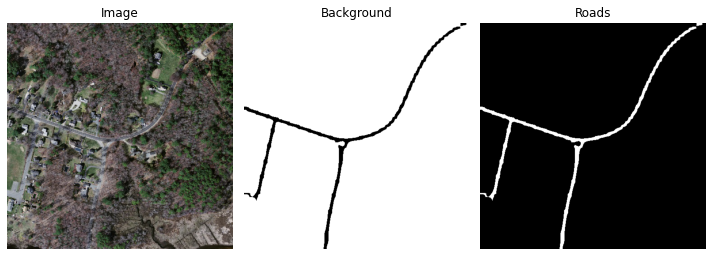

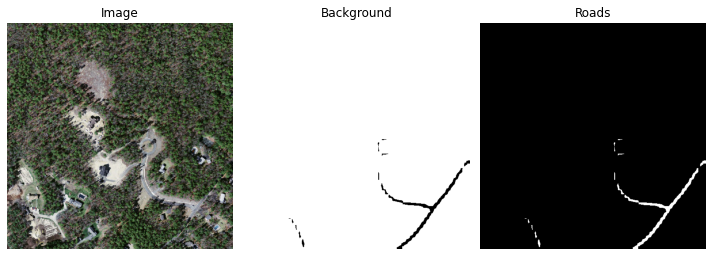

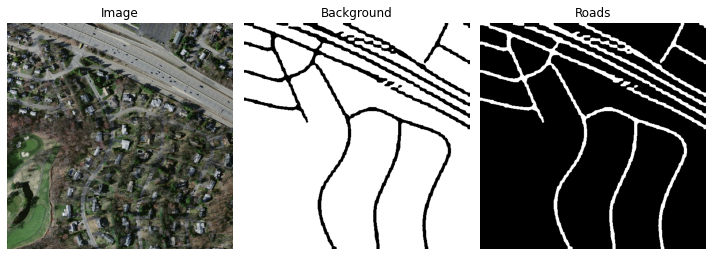

In [9]:
model_path = "./experiments/MassachusettsRoads/checkpoint.pth.tar"
#labels = MassachusettsRoadsDataset.labels
labels = ["Background", "Roads"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('../data/MassachusettsRoads/test_splits/26578720_15_3.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/MassachusettsRoads/test_splits/26278720_15_7.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/MassachusettsRoads/test_splits/22529065_15_1.jpg')
fig = model.predict_masks(image, labels, transform)